<a href="https://colab.research.google.com/github/seon0415/BPA-/blob/main/%EB%B0%95%EC%84%9C%EC%97%B029_0319_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

mpg=pd.read_csv('mpg.csv')
exam=pd.read_csv('exam.csv')

In [13]:
#결측치 만들기

exam.loc[[0,3,7,11],['english']]=np.nan
# exam.query('nclass==5').science=np.nan → 오류
exam['science']=np.where(exam['nclass']==5, np.nan, exam['science'])

exam.isna().sum()

#결측치 채우기
exam['english']=exam['english'].fillna(83.7)
exam['science']=exam['science'].fillna(53.5)

In [16]:
exam['english'].mean()

83.69

In [9]:
exam['science'].mean()

53.5

<Axes: ylabel='hwy'>

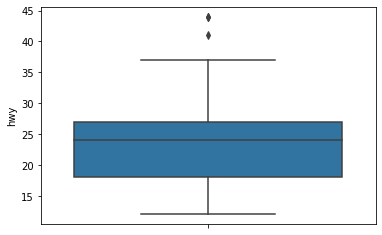

In [46]:
mpg.isna().sum()
sns.boxplot(data=mpg, y='hwy')

In [ ]:
p25=mpg['hwy'].quantile(0.25)
p75=mpg['hwy'].quantile(0.75)
iqr=p75-p25

p25 - 1.5*iqr # 아래 하한선 4.5
p75 + 1.5*iqr # 위의 상한선 40.5

mpg_1=mpg.copy()
mpg_1['hwy']=np.where((mpg_1['hwy'] <4.5)| (mpg_1['hwy']>40.5), np.nan, mpg_1['hwy'])
mpg_1.isna().sum()

mpg_1.dropna(subset=['hwy'], inplace=True)

<Axes: ylabel='hwy'>

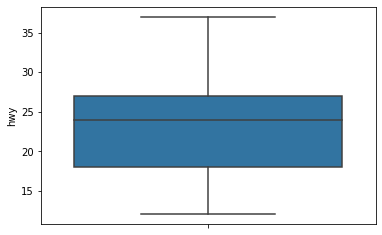

In [36]:
mpg_1.isna().sum()
sns.boxplot(data=mpg_1, y='hwy')

In [47]:
mpg.hwy.mean() #이상치 제거 전

16.858974358974358

In [49]:
mpg_1.hwy.mean() #이상치 제거 후

23.186147186147185

In [65]:
mpg_2=mpg.loc[0]

for i in range(1,5):
    mpg_2=pd.concat([mpg_2,mpg.loc[i]],axis=1)

#mpg_2.to_frame()

In [67]:
mpg_2.reset_index()

,index,0,1,2,3,4
0,manufacturer,audi,audi,audi,audi,audi
1,model,a4,a4,a4,a4,a4
2,displ,1.8,1.8,2.0,2.0,2.8
3,year,1999,1999,2008,2008,1999
4,cyl,4,4,4,4,6
5,trans,auto(l5),manual(m5),manual(m6),auto(av),auto(l5)
6,drv,f,f,f,f,f
7,cty,18,21,20,21,16
8,hwy,29,29,31,30,26
9,fl,p,p,p,p,p
